In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
import numpy as np # linear algebra
import pandas as pd

In [11]:
df= pd.read_csv("Credit_Card_Applications.csv")
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [12]:
X= df.drop("Class", axis=1)

y=df["Class"]

type(y)
# y cannot be pandas dataframe

pandas.core.series.Series

In [13]:
# Like all Unsupervised algorithms, in SOM also we should scale our features for more accurate results
sc = MinMaxScaler(feature_range = (0,1))
sc.fit(X)
X=sc.transform(X)
type(X)
# minisom expects input in numpy array, so we will not convert X to pandas dataframe

numpy.ndarray

In [14]:
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

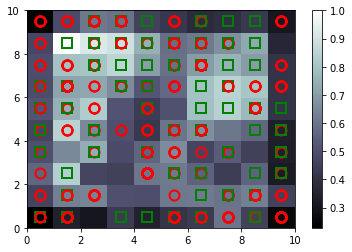

In [17]:
bone()
pcolor(som.distance_map().T) # distance map as background
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    # w[0], w[1] will place the marker at bottom left corner of the rectangle. 
    #Let us add 0.5 to both of these to plot the market at the center of the rectange.
    plot(w[0] + 0.5, 
         w[1] + 0.5,
         #Target value 0 will have marker "o" with color "r"
         #Target value 1 will have marker "s" with color "g"
         markers[y[i]], 
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None', #No color fill inside markers
         markersize = 10,
         markeredgewidth = 2)
show()